In [2]:
import pandas as pd
import numpy as np
from numpy import nan

X_train = ([[nan, 0, 3],
          [3, 7, 9],
          [3, 5, 2],
          [4, nan, 6],
          [8, 8, 1]])

X_test = ([[14, 15, -1],
          [nan, 8, -5]])

In [5]:
# Train imputer
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')
imputer.fit(X_train)
print(imputer.statistics_)

[3.5 6.  3. ]


In [8]:
X_train_fixed = imputer.transform(X_train)

In [7]:
X_test_fixed = imputer.transform(X_test)
print(X_test_fixed)

[[14.  15.  -1. ]
 [ 3.5  8.  -5. ]]


In [9]:
# scaling numberical features min-max scaliong
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train_fixed)
print(mms.scale_)
print(mms.min_)

[0.2   0.125 0.125]
[-0.6    0.    -0.125]


In [10]:
X_train_scaled = mms.transform(X_train_fixed)
print(X_train_scaled)

[[0.1   0.    0.25 ]
 [0.    0.875 1.   ]
 [0.    0.625 0.125]
 [0.2   0.75  0.625]
 [1.    1.    0.   ]]


In [11]:
X_test_scaled = mms.transform(X_test_fixed)
print(X_test_scaled)
# we can't guarantee that the test data is also in 1

[[ 2.2    1.875 -0.25 ]
 [ 0.1    1.    -0.75 ]]


In [12]:
# standardization
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc = stdsc.fit(X_train_fixed)
X_train_std = stdsc.transform(X_train_fixed)
X_test_std = stdsc.transform(X_test_fixed)
print(X_train_std)
print(X_test_std)

[[-0.42399915 -1.86669121 -0.41015156]
 [-0.68899862  0.64616234  1.64060622]
 [-0.68899862 -0.07179582 -0.75194452]
 [-0.15899968  0.28718326  0.61522733]
 [ 1.96099608  1.00514142 -1.09373748]]
[[ 5.14098972  3.51799498 -1.77732341]
 [-0.42399915  1.00514142 -3.14449526]]


In [13]:
# 3. Convert categorical variables to one-hot encodings
from sklearn.preprocessing import OneHotEncoder

# Train data
# 0 0 3
# 1 1 0
# 0 2 1
# 1 0 2
# 分别有，2，3，4个feature

enc = OneHotEncoder()
data = [[0, 0, 3],
       [1,1,0],
       [0,2,1],
       [1,0,2]]
enc.fit(data)
encoding = enc.transform([[0, 1, 1]]).toarray()
print("test data: \n{}".format(encoding))

test data: 
[[1. 0. 0. 1. 0. 0. 1. 0. 0.]]


/Users/yizhuoli/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [15]:
# prediction using PCA
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA(n_components = 2)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduce = pca.transform(X_test)
print(X_test_reduce)

model = GaussianNB()
model.fit(X_train_reducedm, y_train)
y_pred = model.predict(X_test_reduce)


[[-4.10731609e+02  3.36985190e+01]
 [-2.81219335e+02 -2.12845520e+00]
 [-3.56452464e+02 -2.60066854e+01]
 [-3.37443018e+02 -3.92170174e+01]
 [ 1.83470270e+03 -1.18074033e+02]
 [-1.05200751e+02  1.85068469e+02]
 [-1.98627021e+02 -1.94924099e+01]
 [-3.61753401e+02 -2.17360357e+01]
 [-3.90962639e+02 -1.35657855e+01]
 [-4.74123684e+02  2.70744503e+01]
 [-4.10006682e+02  6.86713713e+01]
 [-1.89069555e+02 -3.30095196e+01]
 [ 1.18980298e+03 -7.25381606e+01]
 [ 1.27621071e+02 -9.62382348e+01]
 [ 2.35435605e+03 -7.38627548e+02]
 [-9.29177699e+00 -9.28832675e+01]
 [-3.91640103e+02 -4.25004521e+00]
 [-6.48086776e+02  4.05372301e+01]
 [-5.05491604e+02  3.58977234e+01]
 [-4.39718669e+02  3.42196460e+01]
 [ 1.14902082e+03 -6.12563700e+01]
 [-2.90327764e+02 -1.61203815e+01]
 [-5.27856427e+02  1.39077197e+01]
 [-3.87530246e+02 -8.38746542e+00]
 [ 8.79945422e+01  4.74455704e+01]
 [-5.27856449e+02  4.57777699e+01]
 [-4.69420546e+02  1.47800109e+01]
 [-2.38523565e+02 -7.76354155e+00]
 [-4.30712498e+02  2

NameError: name 'X_train_reducedm' is not defined

In [14]:
# Source: To be added
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)

In [16]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [18]:
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [20]:
pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)
components = pca.transform(faces.data)

In [21]:
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

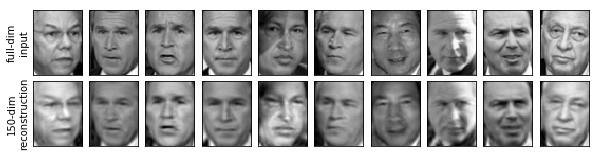

In [26]:
# Visualize the results when have 3000 pixels(top row)
# and when using only 150 components (bottom row)
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                      subplot_kw = {'xticks':[],'yticks':[]},
                      gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')